## Linear Regression

### Import required modules

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
sn.set(style='whitegrid')

 ### load the data file
The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [4]:
# show only the first five rows
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
# the total number of samples is 59
fruits.shape

(59, 7)

In [6]:
# create a mapping from class/fruit label to fruit name
fruit_lable_to_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))   
fruit_lable_to_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Visualize the data using scatter plot

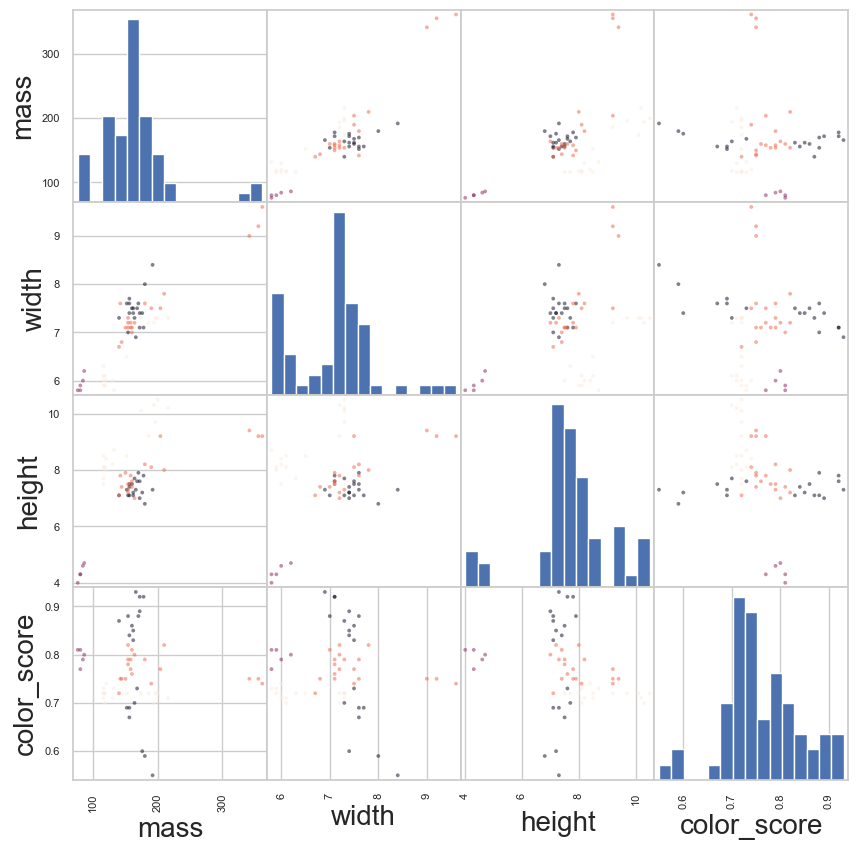

In [7]:
X = fruits.iloc[:,1:]
Y = fruits['fruit_label']
scatter = pd.plotting.scatter_matrix(X, c= Y, marker = '.', s=30, hist_kwds={'bins':15}, figsize=(10,10))
#y labels
temp1=[plt.setp(item.yaxis.get_label(), 'size', 20) for item in scatter.ravel()]
#x labels
temp2=[plt.setp(item.xaxis.get_label(), 'size', 20) for item in scatter.ravel()]

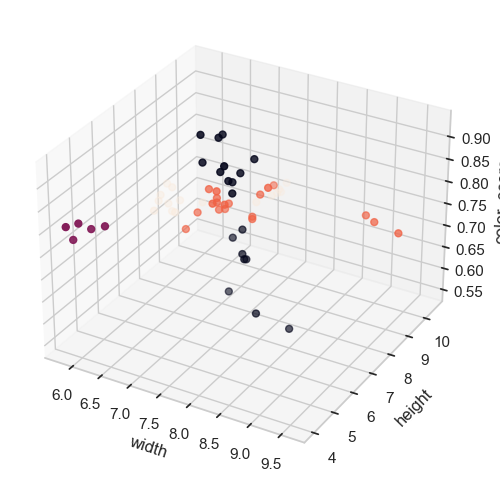

In [8]:
# plotting a 3D scatter plot
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['width'], X['height'], X['color_score'], c = Y, marker = '.', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Goal: build a linear model to predict the mass of a sample given width, height, and color_sore

In [9]:
feature_names = ['width', 'height', 'color_score']
feature_names

['width', 'height', 'color_score']

In [10]:
target_name = ['mass']
target_name

['mass']

### Split the data into a Training dataset and a Testing dataset

In [11]:
X = fruits[feature_names]
Y = fruits[target_name]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
X_train.head()

,width,height,color_score
30,7.1,7.5,0.79
41,7.6,8.2,0.79
33,7.5,8.1,0.74
42,7.2,7.2,0.82
48,7.3,10.1,0.72


In [13]:
Y_train.head()

,mass
30,158
41,180
33,190
42,154
48,174


In [14]:
X_train.shape

(47, 3)

In [15]:
Y_train.shape

(47, 1)

In [16]:
X_test.shape

(12, 3)

In [17]:
Y_test.shape

(12, 1)

### Build a linear regressor

In [18]:
# instance of the regressor
linear_model = LinearRegression(fit_intercept=True)

### Train the classifier using the training data (fit the model to the data)

In [19]:
linear_model.fit(X_train, Y_train)

LinearRegression()

### Use the linear regressor to predict mass of a sample in the testing set

In [20]:
sample_test = X_test.iloc[0,:]
sample_test

width          9.60
height         9.20
color_score    0.74
Name: 26, dtype: float64

In [21]:
mass_predicted = linear_model.predict([sample_test])
print('Mass predicted by linear regressor is', mass_predicted[0,0])
print('True Mass of the sample is', Y_test.iloc[0])

Mass predicted by linear regressor is 300.9650374567753
True Mass of the sample is mass    362
Name: 26, dtype: int64


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Evaluate Performance of the linear regressor on the Training Set and the Testing Set

In [22]:
#coefficient of determination R^2 on training set
linear_model.score(X_train, Y_train)

0.8523395191909264

In [23]:
#coefficient of determination R^2 on testing set
linear_model.score(X_test, Y_test)

0.8466217984120754

### More Evaluation Metrics: mean squared error, mean absolute error, mean absolute percentage error

In [24]:
#convert dataframe to numpy array
X_train = X_train.values
X_test  = X_test.values
Y_train = Y_train.values
Y_test  = Y_test.values
#prediction on the testing dataset
Y_test_pred = linear_model.predict(X_test)
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

MSE= 638.9054197256994
MAE= 18.54452945026141
MAPE= 0.10798195018512809


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
